<a href="https://colab.research.google.com/github/AlexeyTri/MyMachineLearningSeminars/blob/main/Seminar5/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Метод опорных векторов**

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

SVM classification

# SVM CLASSIFICSTION [SKLEARN SVM](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)

kernel:

\begin{align}
\text{linear:    }\left\langle x,x^{'} \right\rangle\\
\text{polinomial:    }(ℽ\left\langle x,x^{'}\right\rangle + r)^d \\
\text{rbf:    }exp(-ℽ||x-x'||^2)\\
\text{sigmoid:    }tanh(ℽ\left\langle x,x^{'}\right\rangle + r)\\
\end{align} 

In [4]:
X, Y = make_classification( n_samples=150,
                           n_features=2,
                           n_informative=2,
                           n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=50, random_state=0)

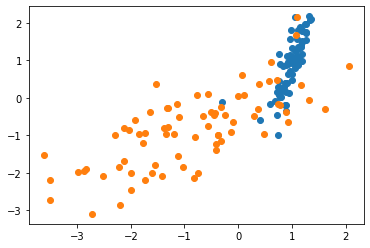

In [5]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')

plt.show()

## SVC

\begin{align}
min_{w,b}\frac{1}{2}w^{⊤}w + C\sum_{i=1}^{n}max(0,1-y_i(w^{⊤}\phi(x_i)+b))
\end{align} 

In [6]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


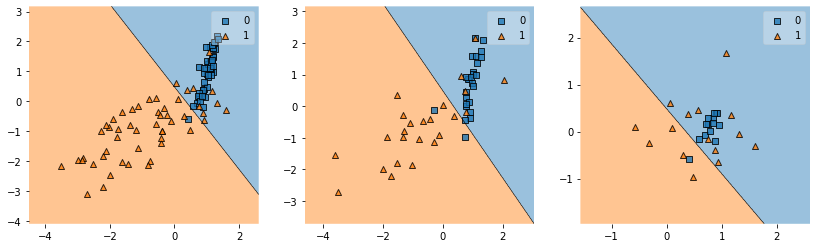

In [9]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax=[]

for i in range(3):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
# support_ - индексы опорных векторов
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

### ядра для SVM

In [10]:
np.random.seed(0)
m=150
n=2
X = 10*np.random.randn(m, n)

Y = np.array((X[:, 0] ** 2 + X[:, 1]** 2 + 50* np.random.randn(m))<100, dtype=np.int64)

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=50, random_state=0)

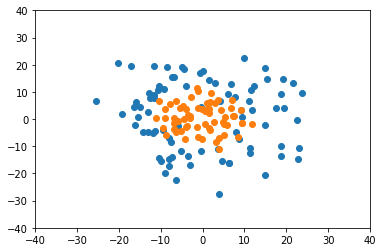

<Figure size 1080x1080 with 0 Axes>

In [11]:
for i in np.unique(Y):
    plt.plot(X[Y==i, 0], X[Y==i, 1], 'o')

plt.axis([-40, 40, -40, 40])
plt.show(plt.figure(figsize=(15, 15)))


In [12]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:239: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:239: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:239: UserWarning: No contour level

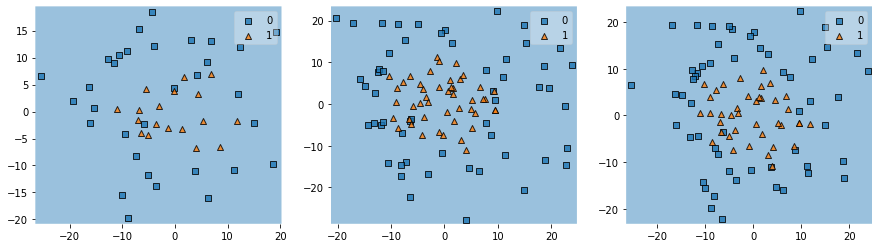

In [13]:
fig, gx = plt.figure(figsize=(15,4)), gridspec.GridSpec(1,3)

ax=[]

for i in range(3):
    ax.append(fig.add_subplot(gx[i]))

plot_decision_regions(X_test, Y_test, model, ax=ax[0])
plot_decision_regions(X_train, Y_train, model, ax=ax[1])
plot_decision_regions(X[model.support_], Y[model.support_],model, ax=ax[2])


plt.show()

In [14]:
model = SVC(kernel='poly')
_= model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


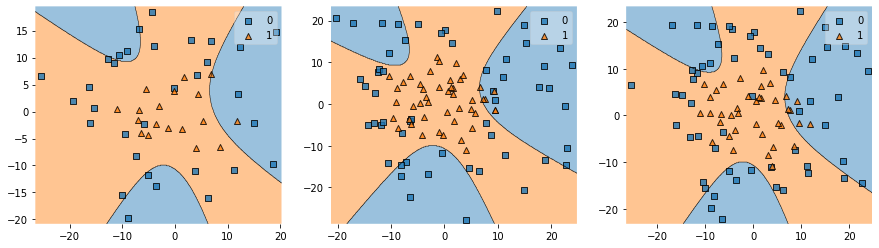

In [15]:
fig, gx = plt.figure(figsize=(15,4)), gridspec.GridSpec(1,3)

ax=[]

for i in range(3):
    ax.append(fig.add_subplot(gx[i]))

plot_decision_regions(X_test, Y_test, model, ax=ax[0])
plot_decision_regions(X_train, Y_train, model, ax=ax[1])
plot_decision_regions(X[model.support_], Y[model.support_],model, ax=ax[2])


plt.show()

In [16]:
model = SVC(kernel='sigmoid')
_ = model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


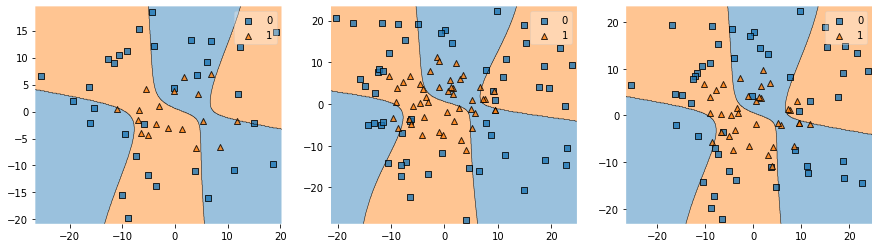

In [17]:
fig, gx = plt.figure(figsize=(15,4)), gridspec.GridSpec(1,3)

ax=[]

for i in range(3):
    ax.append(fig.add_subplot(gx[i]))

plot_decision_regions(X_test, Y_test, model, ax=ax[0])
plot_decision_regions(X_train, Y_train, model, ax=ax[1])
plot_decision_regions(X[model.support_], Y[model.support_],model, ax=ax[2])


plt.show()

In [18]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


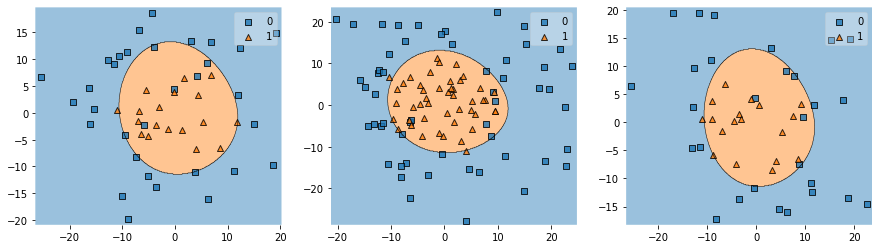

In [19]:
fig, gx = plt.figure(figsize=(15,4)), gridspec.GridSpec(1,3)

ax=[]

for i in range(3):
    ax.append(fig.add_subplot(gx[i]))

plot_decision_regions(X_test, Y_test, model, ax=ax[0])
plot_decision_regions(X_train, Y_train, model, ax=ax[1])
plot_decision_regions(X[model.support_], Y[model.support_],model, ax=ax[2])


plt.show()

In [20]:
def kernel(X1, X2):
    return (X1@X2.T)**2

In [21]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


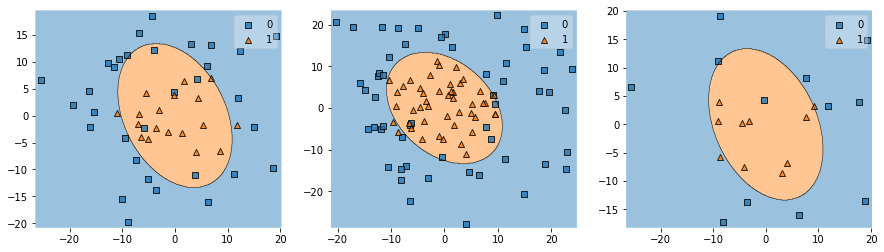

In [22]:
fig, gx = plt.figure(figsize=(15,4)), gridspec.GridSpec(1,3)

ax=[]

for i in range(3):
    ax.append(fig.add_subplot(gx[i]))

plot_decision_regions(X_test, Y_test, model, ax=ax[0])
plot_decision_regions(X_train, Y_train, model, ax=ax[1])
plot_decision_regions(X[model.support_], Y[model.support_],model, ax=ax[2])


plt.show()

# SVM regression

In [23]:
np.random.seed(0)
l = 150

x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4 * np.random.randn(l)

X = np.array([x, np.sin(x)]).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0
                                                    )

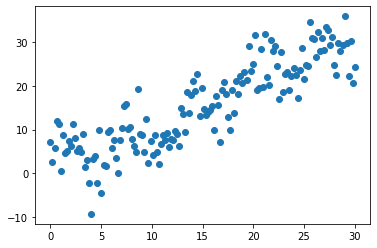

In [24]:
plt.plot(X[:, 0], Y, 'o')
plt.show()

In [25]:
model = SVR(kernel='rbf')
_ = model.fit(X_train, Y_train)

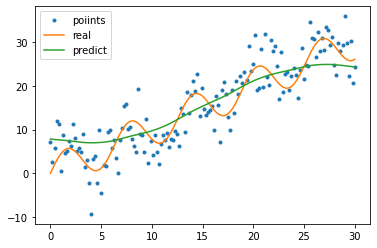

In [26]:
plt.plot(x, Y, '.', label='poiints')
plt.plot(x, Y_without_noise , label='real')
plt.plot(x, model.predict(X),label='predict')
plt.legend(loc='best')
plt.show()

In [27]:
model = SVR(kernel='linear')
_ = model.fit(X_train, Y_train)

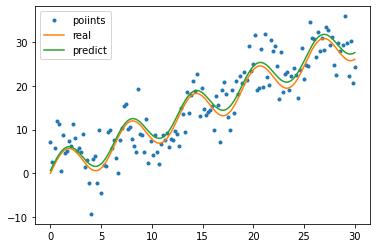

In [28]:
plt.plot(x, Y, '.', label='poiints')
plt.plot(x, Y_without_noise , label='real')
plt.plot(x, model.predict(X),label='predict')
plt.legend(loc='best')
plt.show()

In [29]:
np.random.seed(0)
l = 150
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4 * np.random.randn(l)

X = np.array([x]).T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)


In [30]:
def kernel(X1, X2):
    return np.sin(X1) @ np.sin(X2).T + X1 @ X2.T

In [31]:
model = SVR(kernel=kernel)
_ = model.fit(X_train, Y_train)

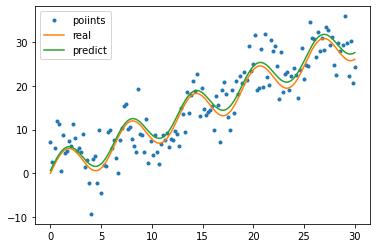

In [32]:
plt.plot(x, Y, '.', label='poiints')
plt.plot(x, Y_without_noise , label='real')
plt.plot(x, model.predict(X),label='predict')
plt.legend(loc='best')
plt.show()

# SVM feature

In [33]:
X, Y = make_classification(n_samples=2500,
                           n_features=10,
                           n_informative=2,
                           n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=10)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=500)

In [34]:
def kernel(X1, X2):
    return np.exp(-0.05 * cdist(X1, X2) **2)

In [35]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.91

In [36]:
X_train_new = np.hstack([kernel(X_train, X_train[model.support_]), X_train])
X_test_new = np.hstack([kernel(X_test, X_train[model.support_]), X_test])

In [37]:
model = SVC(kernel='rbf')
_ = model.fit(X_train_new, Y_train)

model.score(X_test_new, Y_test)

0.914

# Standart Scale

In [39]:
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

In [40]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.86

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


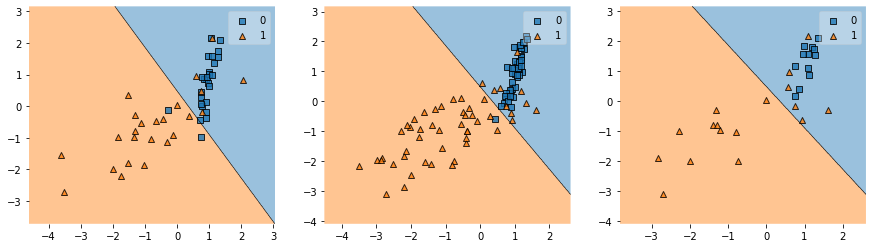

In [41]:
fig, gx = plt.figure(figsize=(15,4)), gridspec.GridSpec(1,3)

ax=[]

for i in range(3):
    ax.append(fig.add_subplot(gx[i]))

plot_decision_regions(X_test, Y_test, model, ax=ax[0])
plot_decision_regions(X_train, Y_train, model, ax=ax[1])
plot_decision_regions(X[model.support_], Y[model.support_],model, ax=ax[2])


plt.show()

In [42]:
np.random.seed(0)
X, Y = make_classification( n_samples=150,
                           n_features=2,
                           n_informative=2,
                           n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X = (X + 1000 * np.random.randn(1,2)) * 1000 * np.random.randn(1,2)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=50, random_state=0)

In [43]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


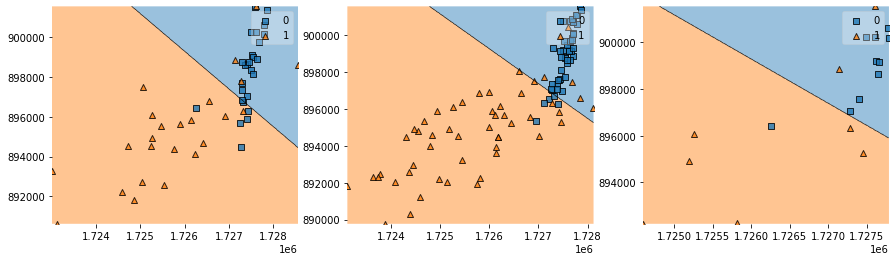

In [44]:
fig, gx = plt.figure(figsize=(15,4)), gridspec.GridSpec(1,3)

ax=[]

for i in range(3):
    ax.append(fig.add_subplot(gx[i]))

plot_decision_regions(X_test, Y_test, model, ax=ax[0])
plot_decision_regions(X_train, Y_train, model, ax=ax[1])
plot_decision_regions(X[model.support_], Y[model.support_],model, ax=ax[2])


plt.show()

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.86

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


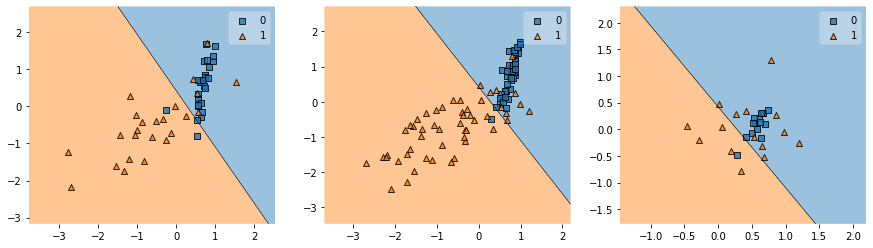

In [47]:
fig, gx = plt.figure(figsize=(15,4)), gridspec.GridSpec(1,3)

ax=[]

for i in range(3):
    ax.append(fig.add_subplot(gx[i]))

plot_decision_regions(X_test, Y_test, model, ax=ax[0])
plot_decision_regions(X_train, Y_train, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],model, ax=ax[2])


plt.show()